# 1**. LIBRARIES NEEDED IN THE PROJECT**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix ,plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve,precision_score
from sklearn.inspection import permutation_importance
import warnings
import pickle #Saveing Model
warnings.filterwarnings('ignore')

# **2. Reading the Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')


# **3. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION**

## 3.1- A General Looking at the Data 


In [ ]:
#Check for top 10 datas using .head()
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
#Check for last 10 datas using .tail()
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Check for rows and columns in the dataset
data.shape

(5110, 12)

In [ ]:
# Check for their Count and Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Check for null Values in data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Check for Duplicate Values
data.duplicated().value_counts()

False    5110
dtype: int64

In [ ]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


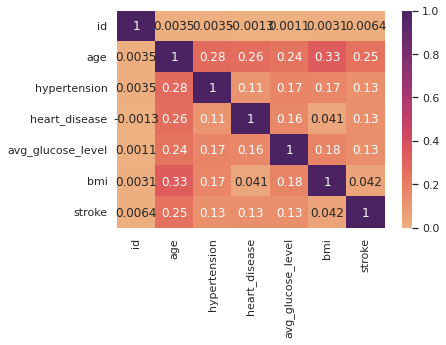

In [ ]:
#checK the correlation among variables using heatmap
sns.heatmap(data.corr(), annot=True,cmap='flare');

## 3.2- Data Cleaning

In [ ]:
# check gender variable
data[['gender','id']].groupby(['gender']).count()

,id
gender,
Female,2994
Male,2115
Other,1


In [ ]:
data = data[data['gender']!='Other']
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.894559902200488
28.1


In [ ]:
#Handleing null values
bmi_mean=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(bmi_mean)

In [ ]:
data['bmi'].isnull().sum()

0

In [ ]:
'''data=data.drop(['id'],axis=1)
data.shape'''

"data=data.drop(['id'],axis=1)\ndata.shape"

In [ ]:
df=data.copy()

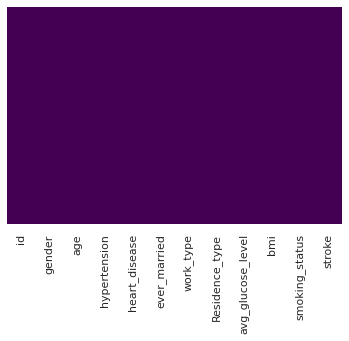

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 3.3 - Examination of Variables & Target Variable

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': round(100 * (dataframe[col_name].value_counts()) / len(dataframe), 2)}))

    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()

   stroke  Ratio
0    4860  95.13
1     249   4.87


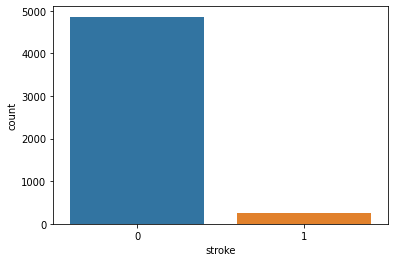

In [ ]:
cat_summary(df, 'stroke', plot=True)

        gender  Ratio
Female    2994   58.6
Male      2115   41.4


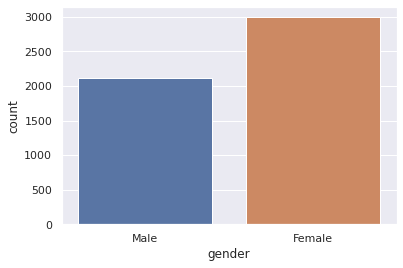

In [ ]:
cat_summary(df, 'gender', plot=True)

In [ ]:
cate_col = ['gender' , 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type' ,'smoking_status' ]

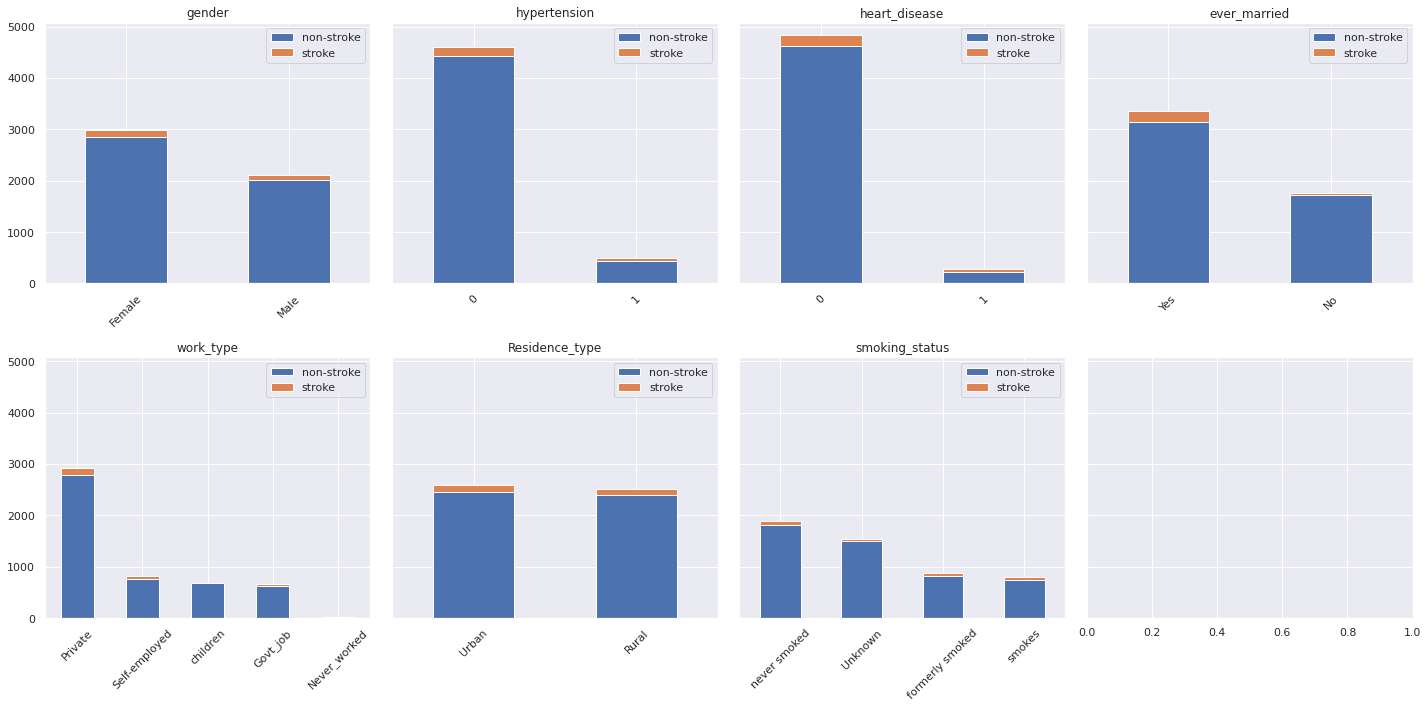

In [ ]:
# Show Counts of Each Categories 

fig , axs = plt.subplots(nrows=2 , ncols=4 , figsize=(20,10) , sharey=True)
axs = axs.ravel()

for index , col in enumerate(cate_col) :
    df_stroke_0 = pd.DataFrame(df[df['stroke'] == 0][col].value_counts()).rename(columns={col : 'non-stroke'})
    df_stroke_1 = pd.DataFrame(df[df['stroke'] == 1][col].value_counts()).rename(columns={col : 'stroke'})
    
    df_final = df_stroke_0.copy()
    df_final['stroke'] = df_stroke_1['stroke']
    df_final.plot(kind='bar' , stacked=True , ax=axs[index])
    
    axs[index].set_title(col)
    axs[index].tick_params('x' ,labelrotation=45)

plt.tight_layout()    

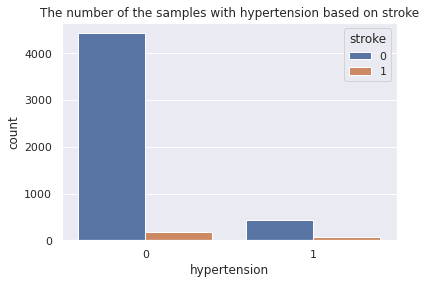

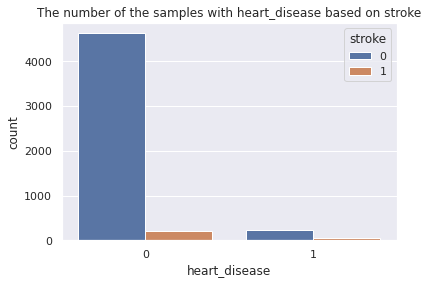

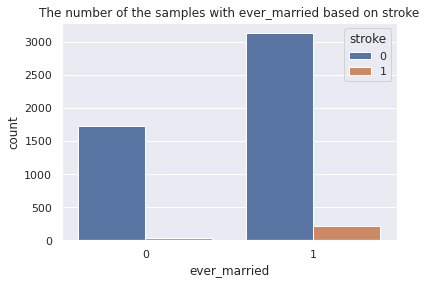

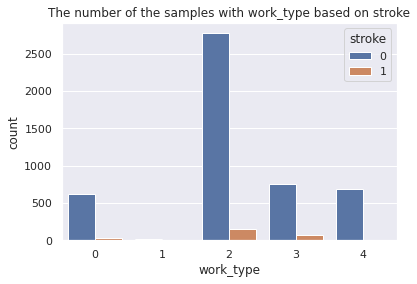

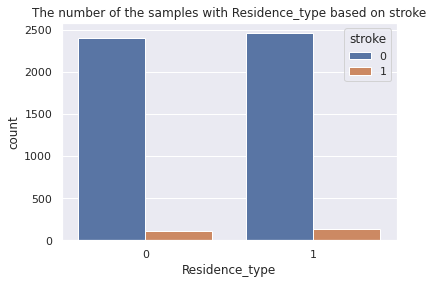

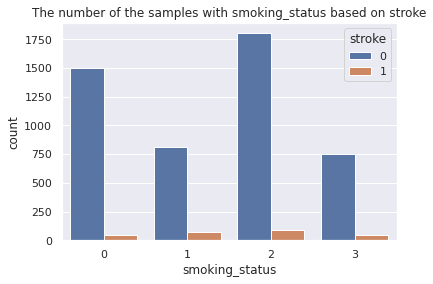

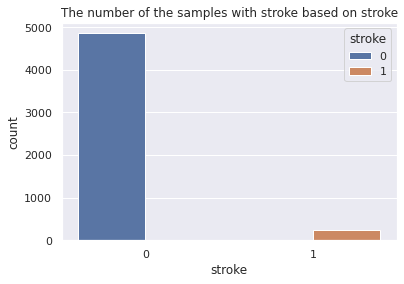

In [ ]:
# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df.columns[1:]:  # exclude stroke column
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

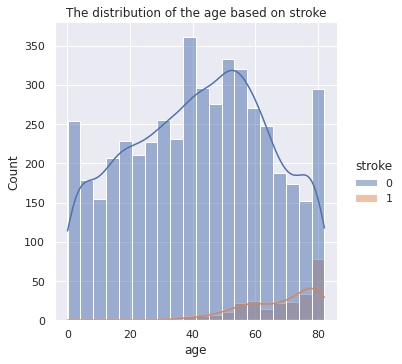

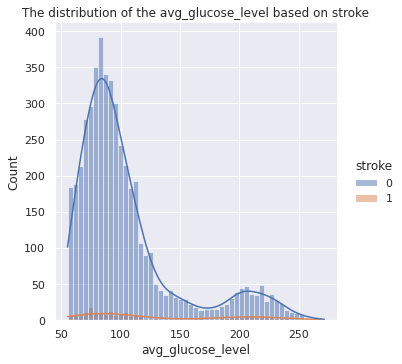

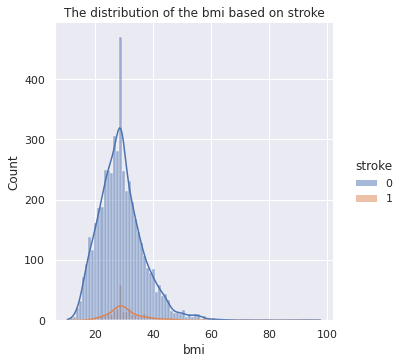

In [ ]:
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()

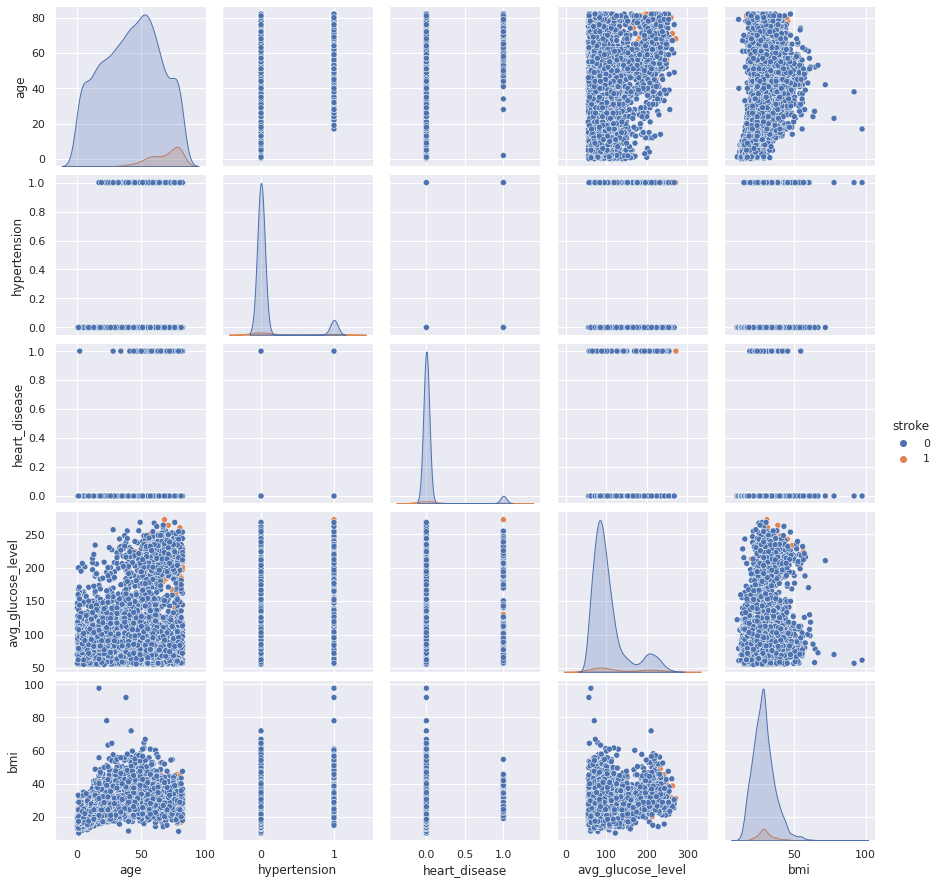

In [ ]:
# Overall plot comparing all independant variable with dependant
sns.pairplot(df, hue="stroke");

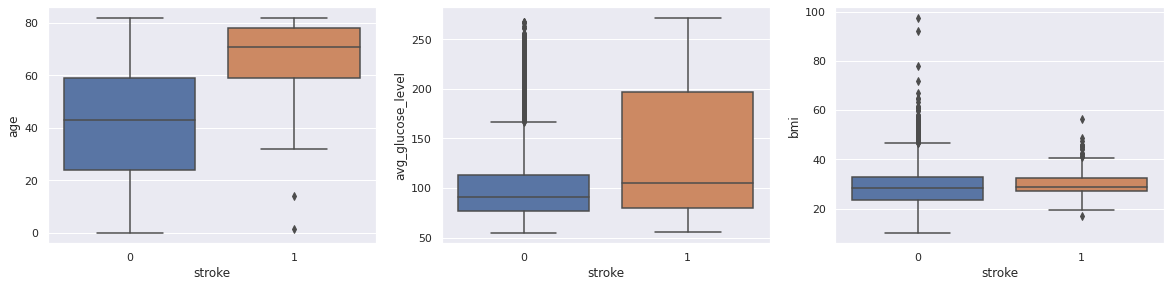

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=df)

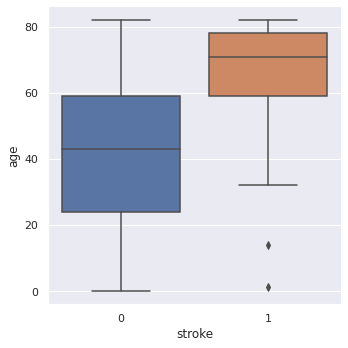

In [ ]:
sns.catplot(data=df, x="stroke", y="age", kind="box") #checking for outliers

In [ ]:
indexAge = data[((df['age'] < 20) & (df['stroke'] == 1)) ].index  #find the indexes of outliers
data.drop(indexAge , inplace=True) # drop the outliers

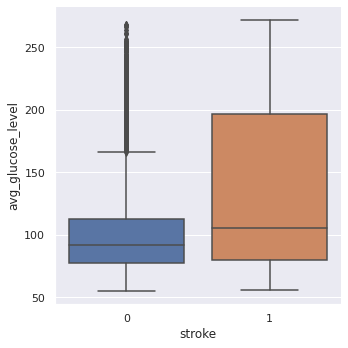

In [ ]:
sns.catplot(data=df, x="stroke", y="avg_glucose_level", kind="box")

In [ ]:
indexAge = data[((df['avg_glucose_level'] > 220) & (df['stroke'] == 0)) ].index
data.drop(indexAge , inplace=True)

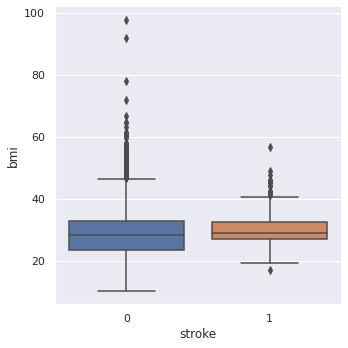

In [ ]:
sns.catplot(data=df, x="stroke", y="bmi", kind="box")

In [ ]:
indexAge = data[((df['bmi'] > 50) & (df['stroke'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] > 40) & (df['stroke'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] < 19) & (df['stroke'] == 1)) ].index
indexAge.shape
data.drop(indexAge , inplace=True)

0    4860
1     249
Name: stroke, dtype: int64


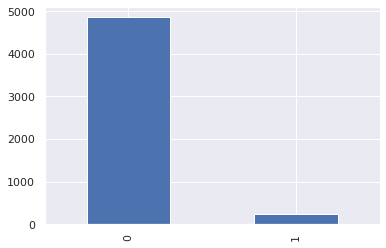

In [ ]:
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

# **4. Prediction Model Building**

We are creating a Machine Learning Model using Loigistic Regression & Support vector Machine

In [ ]:
df.shape

(5109, 11)

In [ ]:
# we convert categorical variables into Numeric
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()  

df['gender'] = lb.fit_transform(df['gender'])
df['ever_married'] = lb.fit_transform(df['ever_married'])
df['work_type'] = lb.fit_transform(df['work_type'])
df['Residence_type'] = lb.fit_transform(df['Residence_type'])
df['smoking_status'] = lb.fit_transform(df['smoking_status'])
df['stroke'] = lb.fit_transform(df['stroke'])
df.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60000,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.20000,0,0


In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1


In [ ]:
#checK the correlation among variables
df.corr().style.background_gradient(cmap='flare')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.025605,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.325861,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.160151,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.038865,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.335564,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299496,-0.305942,-0.032323
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000288,0.008168,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.168913,0.063498,0.131991
bmi,-0.025605,0.325861,0.160151,0.038865,0.335564,-0.299496,-0.000288,0.168913,1.000000,0.219108,0.038917
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.063498,0.219108,1.000000,0.028108


In [ ]:
# Extracting features
X=df.drop('stroke',axis='columns')
# Target variable
y=df['stroke'] 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Split the datasets into train and test subsets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Shape of training data", X_train.shape, y_train.shape)
print("Shape of testing data", X_test.shape, y_test.shape)

Shape of training data (4087, 10) (4087,)
Shape of testing data (1022, 10) (1022,)


While using such data to train a machine-level model may result in accuracy, other accuracy measures such as precision and recall are inadequate. If such an unbalanced data is not dealt with properly, the findings will be inaccurate, and the forecast will be ineffective. As a result, to obtain an efficient model, this unbalanced data must be dealt with first. ''The SMOTE technique'' was employed for this purpose.bold text

 **Balancing Dataset**

As we know, our dataset is imbalanced. So let’s balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of the training dataset but it didn’t perform that well so I tried this approach and got a good result.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
X_test,y_test=smote.fit_resample(X_test,y_test)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7756, 10) (7756,) (1964, 10) (1964,)


## 4.1- Logistic Regression

In [ ]:
# training data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print("Logistic Regression Model Score :",log_reg.score(X_test,y_test)*100)

Logistic Regression Model Score : 78.41140529531569


In [ ]:
# accuracy on test data
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy * 100)

Accuracy on Test data :  78.41140529531569


In [ ]:
from sklearn.metrics import precision_score
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, X_test_prediction))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:" ,recall_score(y_test, X_test_prediction))

Precision: 0.7672413793103449
Recall: 0.8156822810590632


**Confusion Matrix**
❗
❗
❗

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form

[[739 243]
 [181 801]]


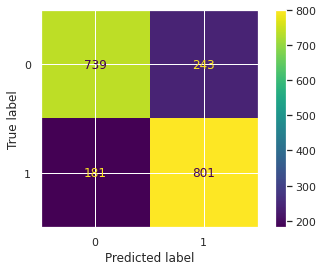

In [ ]:
#Seaborn Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cf_matrix = confusion_matrix(y_test, X_test_prediction)

print(cf_matrix)
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

**ROC Curve (Receiver Operating Characteristic)**
❗
❗
❗

The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

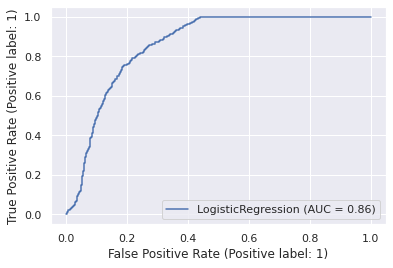

In [ ]:
# ROC (Receiver Operating Curve) and AUC (Area Under Curve) 
plot_roc_curve(log_reg, X_test, y_test);

**Precision Recall Curve**
❗
❗
❗

A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis.

It is important to note that Precision is also called the Positive Predictive Value (PPV)
Recall is also called Sensitivity, Hit Rate or True Positive Rate (TPR)

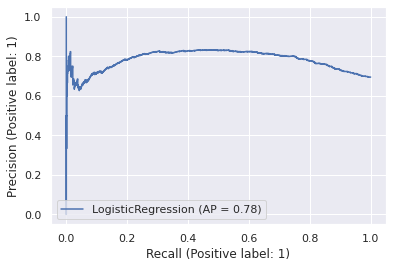

In [ ]:
#PR curve
plot_precision_recall_curve(log_reg, X_test, y_test);

In [ ]:
log_reg.fit(X_train, y_train)  
# save the model to disk
filename = 'LOG_NUM2.sav'
pickle.dump(log_reg, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [ ]:
# Input values for testing the model
# strok
input_data_1 = (1 ,	67.0 ,	0 ,	1 ,	1 ,	2 ,	1 ,	228.69 ,	36.60000 , 1)
#Not strok
input_data_2 = (1 ,	51.0 ,	0 ,	0 ,	1 ,	2 ,	0 ,	166.29 ,	25.60000 ,	1 )

# Change the input list to numpy array
input_data_numpy_array = np.asarray(input_data_1)

# Reshape the numpy array for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# Standardized the input data
std_data = sc.transform(input_data_reshaped)

# Prediction Result
prediction = log_reg.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print(' There is not stroke ')
else:
  print(' There is stroke ')

[1]
 There is stroke 


## 4.2 Support Vector Machine (SVM)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn import svm
svc = svm.SVC( C=10, gamma=1000 ,probability= True , kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(C=10, gamma=1000, kernel='linear', probability=True)

In [ ]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
from sklearn import metrics
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))


Accuracy score 0.793


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:" ,metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:" ,metrics.recall_score(y_test, y_predict))

Precision: 0.7649769585253456
Recall: 0.845213849287169


[[727 255]
 [152 830]]


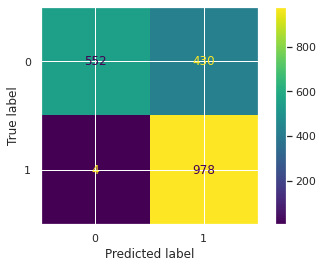

In [ ]:
#Seaborn Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

cf_matrix = confusion_matrix(y_test,y_predict)
print(cf_matrix)
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

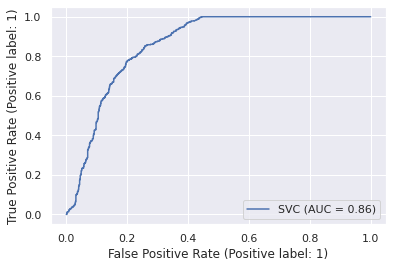

In [ ]:
#ROC (Receiver Operating Curve) and AUC (Area Under Curve)
plot_roc_curve(svc, X_test, y_test);

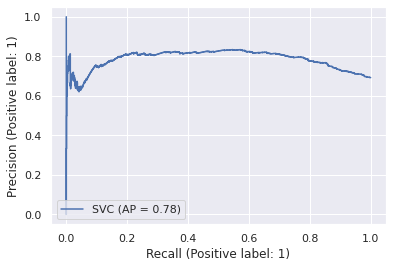

In [ ]:
plot_precision_recall_curve(svc, X_test, y_test);

In [ ]:
svc.fit(X_train, y_train)  
# save the model to disk
filename = 'SVM_NUM2.sav'
pickle.dump(svc, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [ ]:
# Input values for testing the model
# strok
input_data_1 = (1 ,	67.0 ,	0 ,	1 ,	1 ,	2 ,	1 ,	228.69 ,	36.60000 , 1)
#Not strok
input_data_2 = (0 ,	80.0 ,	1	, 0 ,	1 ,	2 ,	1 ,	83.75 ,	28.89456 ,	2)

# Change the input list to numpy array
input_data_numpy_array = np.asarray(input_data_1)

# Reshape the numpy array for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# Standardized the input data
std_data = sc.transform(input_data_reshaped)

# Prediction Result
prediction = svc.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print(' There is not stroke ')
else:
  print(' There is stroke ')

[1]
 There is stroke 
